Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8576 - loss: 0.3446 - val_accuracy: 0.8642 - val_loss: 0.3188
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8611 - loss: 0.3257 - val_accuracy: 0.8654 - val_loss: 0.3199
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8625 - loss: 0.3218 - val_accuracy: 0.8656 - val_loss: 0.3157
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8628 - loss: 0.3198 - val_accuracy: 0.8659 - val_loss: 0.3170
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8641 - loss: 0.3183 - val_accuracy: 0.8656 - val_loss: 0.3189
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8657 - loss: 0.3155 - val_accuracy: 0.8652 - val_loss: 0.3146
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8642 - loss: 0.3187 - val_accuracy: 0.8665 - val_loss: 0.3142
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8639 - loss: 0

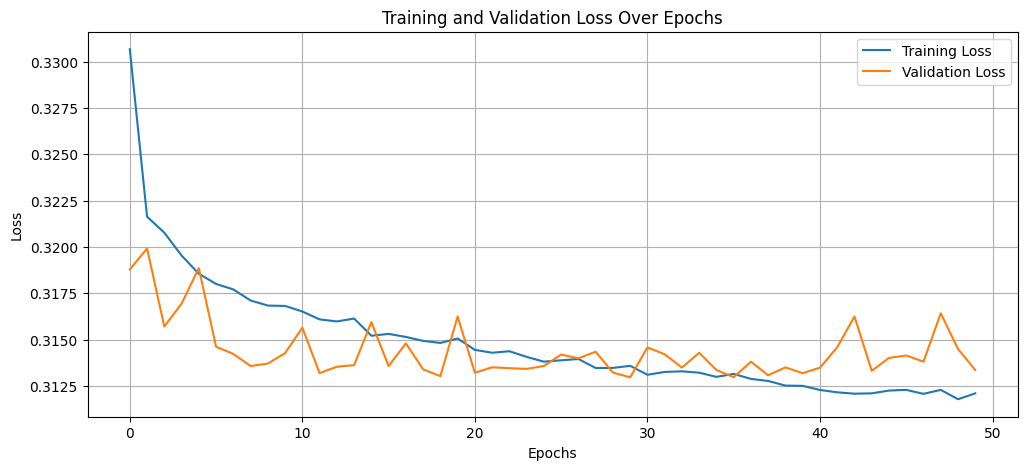

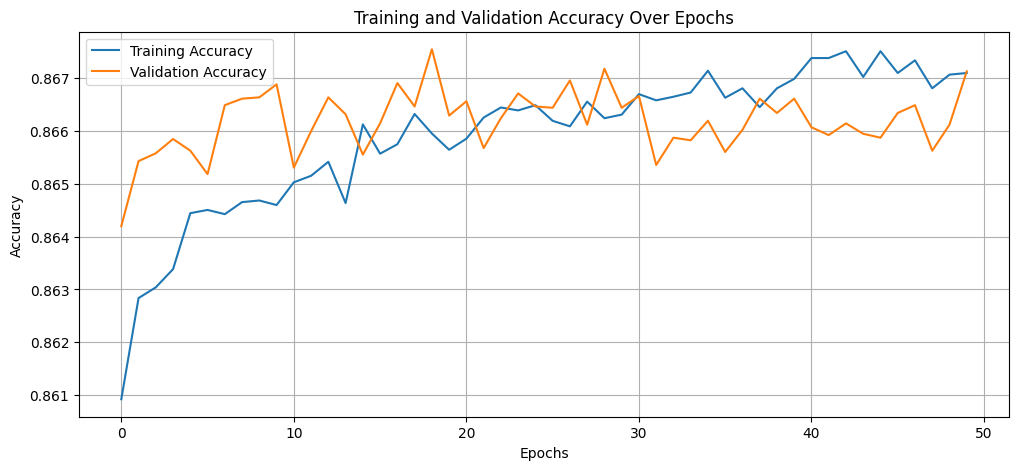

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


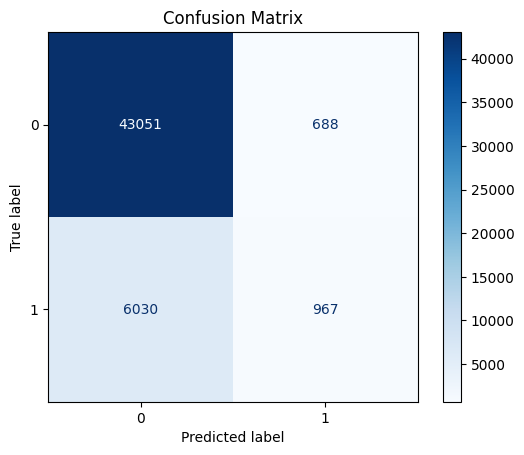

              precision    recall  f1-score   support

     Class 0       0.88      0.98      0.93     43739
     Class 1       0.58      0.14      0.22      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.84      0.87      0.83     50736



In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes_binary_health_indicators_BRFSS2015.csv'

import pandas as pd
data = pd.read_csv(file_path)

data.head()

X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                   'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                   'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                   'NoDocbcCost', 'DiffWalk', 'Sex']
numeric_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))
